# Problem Statement

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model. This project contains two phase-

# Data Collection Phase

In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and
at last target variable Price of the car. This data is to give you a hint about important variables in
used car model. You can make changes to it, you can add or you can remove some columns, it
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan,
Hatchback.

Data Gathering using selenium is not included beacause the data of website continously changes day per day, so it causes change in feature engineering and affect model performance also, so we used the data which is scraped for first time 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)


# Data Loading and Data Analysis

In [3]:
#read csv file first
car=pd.read_csv("E:\\Data Science\\Flip robo Project\\Car Price Prediction\\used_cars_data1.csv")
car

S.No.                                              Brand    Location  \
0         0                             Maruti Wagon R LXI CNG      Mumbai   
1         1                   Hyundai Creta 1.6 CRDi SX Option        Pune   
2         2                                       Honda Jazz V     Chennai   
3         3                                  Maruti Ertiga VDI     Chennai   
4         4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore   
...     ...                                                ...         ...   
7248   7248                  Volkswagen Vento Diesel Trendline   Hyderabad   
7249   7249                             Volkswagen Polo GT TSI      Mumbai   
7250   7250                             Nissan Micra Diesel XV     Kolkata   
7251   7251                             Volkswagen Polo GT TSI        Pune   
7252   7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...       Kochi   

      Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0     2010              72000       CNG       Manual      First  26.6 km/kg   
1     2015              41000    Diesel       Manual      First  19.67 kmpl   
2     2011              46000    Petrol       Manual      First   18.2 kmpl   
3     2012              87000    Diesel       Manual      First  20.77 kmpl   
4     2013              40670    Diesel    Automatic     Second   15.2 kmpl   
...    ...                ...       ...          ...        ...         ...   
7248  2011              89411    Diesel       Manual      First  20.54 kmpl   
7249  2015              59000    Petrol    Automatic      First  17.21 kmpl   
7250  2012              28000    Diesel       Manual      First  23.08 kmpl   
7251  2013              52262    Petrol    Automatic      Third   17.2 kmpl   
7252  2014              72443    Diesel    Automatic      First   10.0 kmpl   

       Engine      Power  Seats  Price  
0      998 CC  58.16 bhp    5.0   1.75  
1     1582 CC  126.2 bhp    5.0  12.50  
2     1199 CC   88.7 bhp    5.0   4.50  
3     1248 CC  88.76 bhp    7.0   6.00  
4     1968 CC  140.8 bhp    5.0  17.74  
...       ...        ...    ...    ...  
7248  1598 CC  103.6 bhp    5.0    NaN  
7249  1197 CC  103.6 bhp    5.0    NaN  
7250  1461 CC   63.1 bhp    5.0    NaN  
7251  1197 CC  103.6 bhp    5.0    NaN  
7252  2148 CC    170 bhp    5.0    NaN  

[7253 rows x 13 columns]

In [4]:
car.shape

(7253, 13)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Brand              7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 736.8+ KB


In [6]:
car.isnull().sum()

S.No.                   0
Brand                   0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
Price                1234
dtype: int64

In [7]:
# here we drop column serial number

In [8]:
car=car.drop(columns=['S.No.'],axis=1)

In [9]:
car.head()

Brand    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price  
0   1.75  
1  12.50  
2   4.50  
3   6.00  
4  17.74

In [10]:
car[['Mileage','KMPL']]=car.Mileage.str.split(expand=True)

In [11]:
car.head()

Brand    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type Mileage   Engine      Power  Seats  Price  \
0       CNG       Manual      First    26.6   998 CC  58.16 bhp    5.0   1.75   
1    Diesel       Manual      First   19.67  1582 CC  126.2 bhp    5.0  12.50   
2    Petrol       Manual      First    18.2  1199 CC   88.7 bhp    5.0   4.50   
3    Diesel       Manual      First   20.77  1248 CC  88.76 bhp    7.0   6.00   
4    Diesel    Automatic     Second    15.2  1968 CC  140.8 bhp    5.0  17.74   

    KMPL  
0  km/kg  
1   kmpl  
2   kmpl  
3   kmpl  
4   kmpl

In [12]:
car.shape

(7253, 13)

# Feature Engineering

In [13]:
car[['Engine','CC']]=car.Engine.str.split(expand=True)

In [14]:
car.head()

Brand    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type Mileage Engine      Power  Seats  Price  \
0       CNG       Manual      First    26.6    998  58.16 bhp    5.0   1.75   
1    Diesel       Manual      First   19.67   1582  126.2 bhp    5.0  12.50   
2    Petrol       Manual      First    18.2   1199   88.7 bhp    5.0   4.50   
3    Diesel       Manual      First   20.77   1248  88.76 bhp    7.0   6.00   
4    Diesel    Automatic     Second    15.2   1968  140.8 bhp    5.0  17.74   

    KMPL  CC  
0  km/kg  CC  
1   kmpl  CC  
2   kmpl  CC  
3   kmpl  CC  
4   kmpl  CC

In [15]:
car['Power']=car['Power'].replace('bhp','')


In [16]:
car.head(50)

Brand    Location  Year  \
0                             Maruti Wagon R LXI CNG      Mumbai  2010   
1                   Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2                                       Honda Jazz V     Chennai  2011   
3                                  Maruti Ertiga VDI     Chennai  2012   
4                    Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
5                    Hyundai EON LPG Era Plus Option   Hyderabad  2012   
6                             Nissan Micra Diesel XV      Jaipur  2013   
7                  Toyota Innova Crysta 2.8 GX AT 8S      Mumbai  2016   
8                Volkswagen Vento Diesel Comfortline        Pune  2013   
9                     Tata Indica Vista Quadrajet LS     Chennai  2012   
10                                  Maruti Ciaz Zeta       Kochi  2018   
11                       Honda City 1.5 V AT Sunroof     Kolkata  2012   
12                             Maruti Swift VDI BSIV      Jaipur  2015   
13                  Land Rover Range Rover 2.2L Pure       Delhi  2014   
14                    Land Rover Freelander 2 TD4 SE        Pune  2012   
15                       Mitsubishi Pajero Sport 4X4       Delhi  2014   
16                             Honda Amaze S i-Dtech       Kochi  2016   
17                             Maruti Swift DDiS VDI      Jaipur  2017   
18               Renault Duster 85PS Diesel RxL Plus       Kochi  2014   
19  Mercedes-Benz New C-Class C 220 CDI BE Avantgare   Bangalore  2014   
20                                 BMW 3 Series 320d       Kochi  2014   
21                     Maruti S Cross DDiS 200 Alpha   Bangalore  2015   
22              Audi A6 2011-2015 35 TFSI Technology      Mumbai  2015   
23                             Hyundai i20 1.2 Magna     Kolkata  2010   
24               Volkswagen Vento Petrol Highline AT     Kolkata  2010   
25                      Honda City Corporate Edition      Mumbai  2012   
26                            Nissan Micra Diesel XV   Hyderabad  2012   
27                     Maruti Alto K10 2010-2014 VXI   Hyderabad  2013   
28                               Honda WRV i-VTEC VX       Kochi  2018   
29               Toyota Innova 2.5 V Diesel 7-seater      Mumbai  2007   
30              Renault Duster 110PS Diesel RxZ Pack   Bangalore  2013   
31                            Toyota Corolla Altis G       Delhi  2012   
32                     Mahindra Ssangyong Rexton RX7   Bangalore  2013   
33                                   Audi A6 2.7 TDI     Kolkata  2010   
34                     Volkswagen Vento 1.6 Highline  Coimbatore  2014   
35                          Maruti Wagon R LXI BSIII      Jaipur  2009   
36                     Maruti Vitara Brezza ZDi Plus       Kochi  2018   
37           Mahindra KUV 100 mFALCON G80 K6 5str AW       Delhi  2017   
38                  Mercedes-Benz M-Class ML 350 CDI        Pune  2013   
39             Volkswagen Polo Diesel Trendline 1.2L     Chennai  2013   
40                                   Maruti Alto LXi       Delhi  2008   
41                                   Tata Nano LX SE       Kochi  2014   
42         Mahindra KUV 100 mFALCON D75 K8 Dual Tone  Coimbatore  2017   
43                    Hyundai i20 Magna Optional 1.2       Kochi  2014   
44                  Hyundai Elantra 2.0 SX Option AT   Bangalore  2014   
45                         Toyota Corolla Altis G AT      Mumbai  2016   
46                              Hyundai Elantra CRDi   Ahmedabad  2008   
47                    Toyota Innova Crysta 2.7 GX MT   Bangalore  2012   
48                          Hyundai Xcent 1.1 CRDi S      Jaipur  2014   
49                             Mahindra Thar CRDe AC      Jaipur  2012   

    Kilometers_Driven Fuel_Type Transmission      Owner_Type Mileage Engine  \
0               72000       CNG       Manual           First    26.6    998   
1               41000    Diesel       Manual           First   19.67   1582   
2               46000    Petrol    

In [17]:
car.shape

(7253, 14)

In [18]:
car[['Power','bhp']]=car.Power.str.split(expand=True)

In [19]:
car.shape

(7253, 15)

In [20]:
car.head()

Brand    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type Mileage Engine  Power  Seats  Price  \
0       CNG       Manual      First    26.6    998  58.16    5.0   1.75   
1    Diesel       Manual      First   19.67   1582  126.2    5.0  12.50   
2    Petrol       Manual      First    18.2   1199   88.7    5.0   4.50   
3    Diesel       Manual      First   20.77   1248  88.76    7.0   6.00   
4    Diesel    Automatic     Second    15.2   1968  140.8    5.0  17.74   

    KMPL  CC  bhp  
0  km/kg  CC  bhp  
1   kmpl  CC  bhp  
2   kmpl  CC  bhp  
3   kmpl  CC  bhp  
4   kmpl  CC  bhp

In [21]:
car=car.drop(columns=['KMPL','CC','bhp'],axis=1)
car.head(5)

Brand    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type Mileage Engine  Power  Seats  Price  
0       CNG       Manual      First    26.6    998  58.16    5.0   1.75  
1    Diesel       Manual      First   19.67   1582  126.2    5.0  12.50  
2    Petrol       Manual      First    18.2   1199   88.7    5.0   4.50  
3    Diesel       Manual      First   20.77   1248  88.76    7.0   6.00  
4    Diesel    Automatic     Second    15.2   1968  140.8    5.0  17.74

In [22]:
car.tail(5)

Brand   Location  Year  \
7248                  Volkswagen Vento Diesel Trendline  Hyderabad  2011   
7249                             Volkswagen Polo GT TSI     Mumbai  2015   
7250                             Nissan Micra Diesel XV    Kolkata  2012   
7251                             Volkswagen Polo GT TSI       Pune  2013   
7252  Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...      Kochi  2014   

      Kilometers_Driven Fuel_Type Transmission Owner_Type Mileage Engine  \
7248              89411    Diesel       Manual      First   20.54   1598   
7249              59000    Petrol    Automatic      First   17.21   1197   
7250              28000    Diesel       Manual      First   23.08   1461   
7251              52262    Petrol    Automatic      Third    17.2   1197   
7252              72443    Diesel    Automatic      First    10.0   2148   

      Power  Seats  Price  
7248  103.6    5.0    NaN  
7249  103.6    5.0    NaN  
7250   63.1    5.0    NaN  
7251  103.6    5.0    NaN  
7252    170    5.0    NaN

In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


# Check for empty space

We will check any empty space is there or not

In [24]:
car.loc[car['Mileage']==' ']

Empty DataFrame
Columns: [Brand, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []

In [25]:
car.loc[car['Engine']==' ']

Empty DataFrame
Columns: [Brand, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []

In [26]:
car.loc[car['Power']==' ']

Empty DataFrame
Columns: [Brand, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []

In [27]:
car.loc[car['Price']==' ']

Empty DataFrame
Columns: [Brand, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Price]
Index: []

In [28]:
car['Power']

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
7248    103.6
7249    103.6
7250     63.1
7251    103.6
7252      170
Name: Power, Length: 7253, dtype: object

In [29]:
car['Power'] = pd.to_numeric(car['Power'].str.replace(",", ""), errors='coerce')

# Univariate Analysis for Categorical Feature

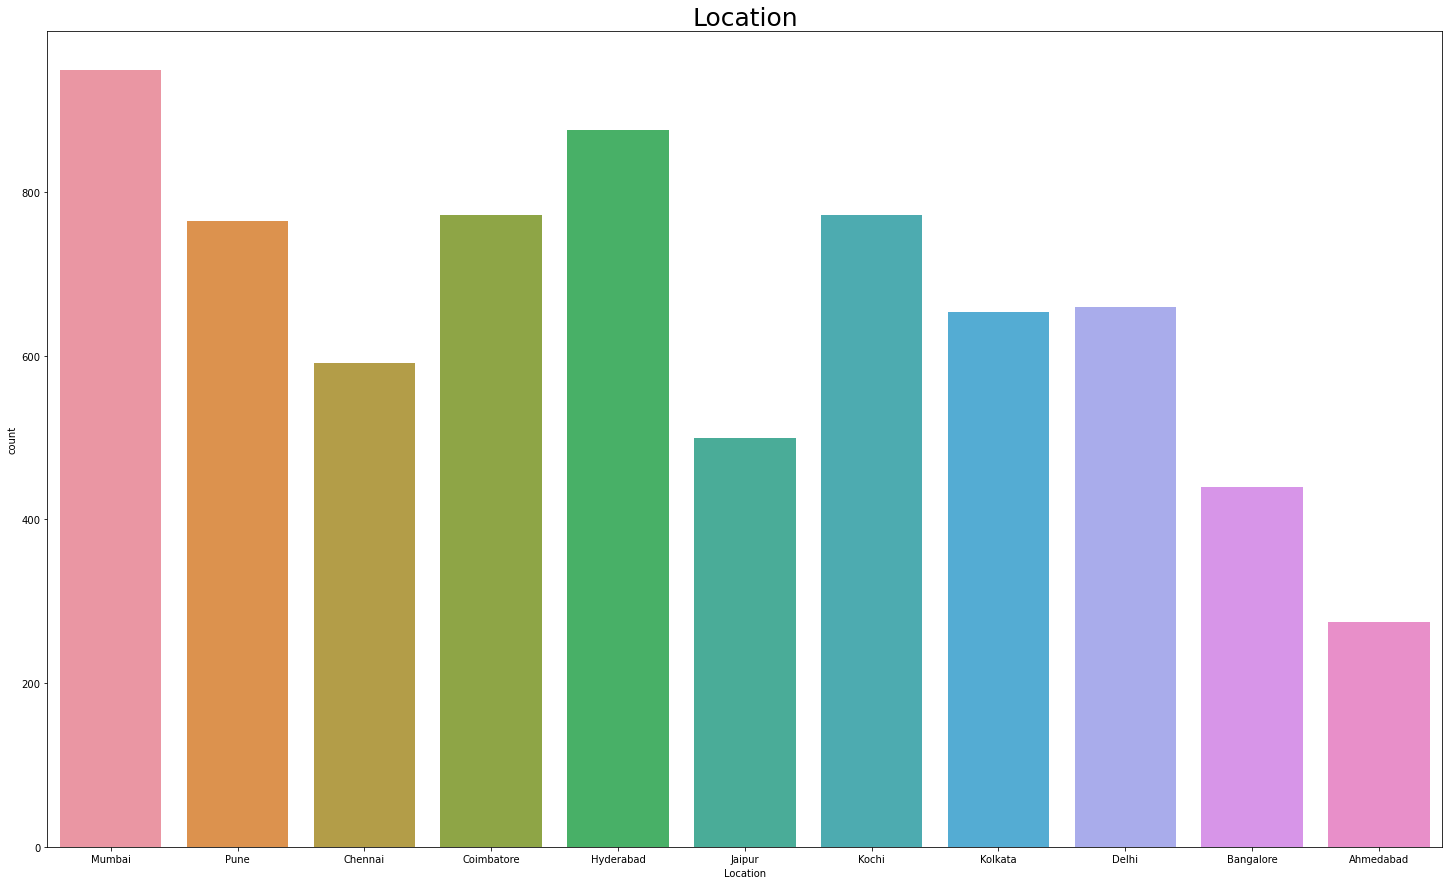

In [30]:
plt.figure(figsize=(25,15))
sns.countplot(car['Location'])
plt.title('Location',fontsize=25)
plt.show()

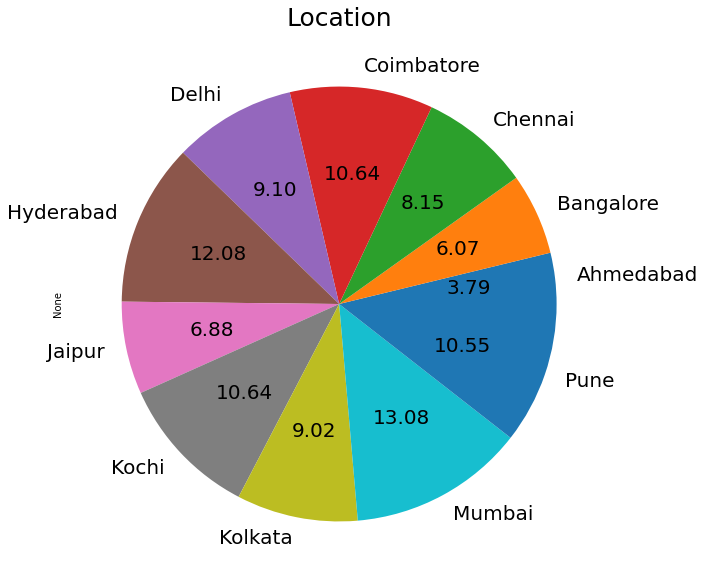

In [31]:
plt.figure(figsize=(15,10))
car.groupby('Location').size().plot(kind='pie', autopct='%.2f',fontsize=20)
plt.title('Location',fontsize=25)
plt.show()

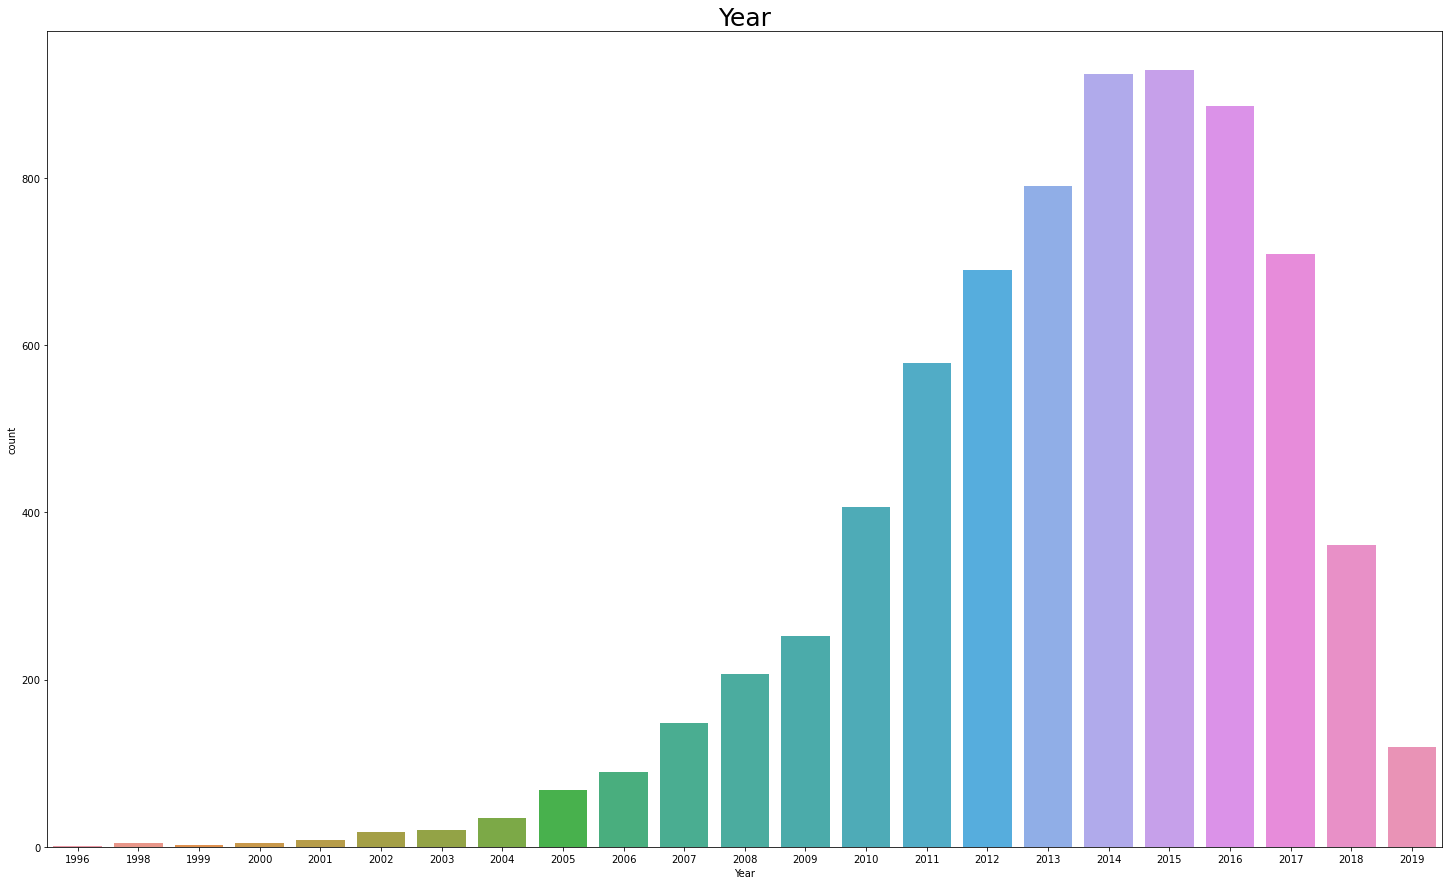

In [32]:
plt.figure(figsize=(25,15))
sns.countplot(car['Year'])
plt.title('Year',fontsize=25)
plt.show()

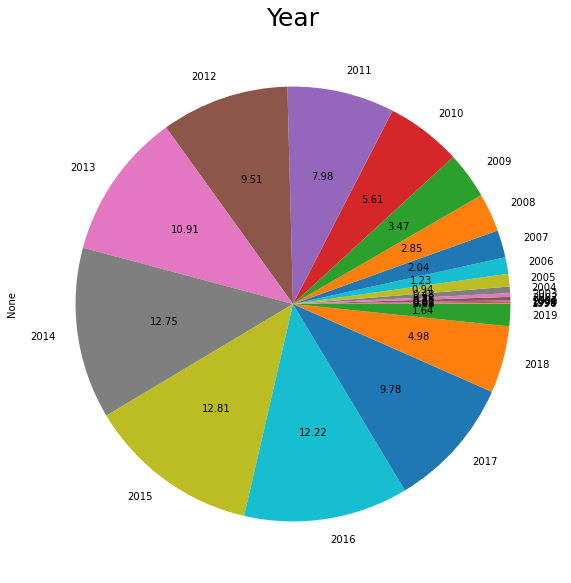

In [33]:
plt.figure(figsize=(15,10))
car.groupby('Year').size().plot(kind='pie', autopct='%.2f',fontsize=10)
plt.title('Year',fontsize=25)
plt.show()

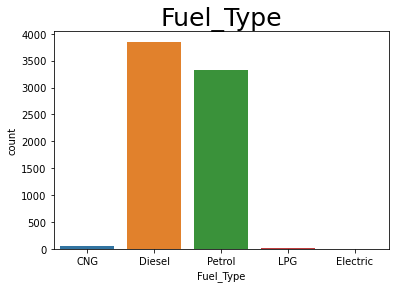

In [34]:
sns.countplot(car['Fuel_Type'])
plt.title('Fuel_Type',fontsize=25)
plt.show()

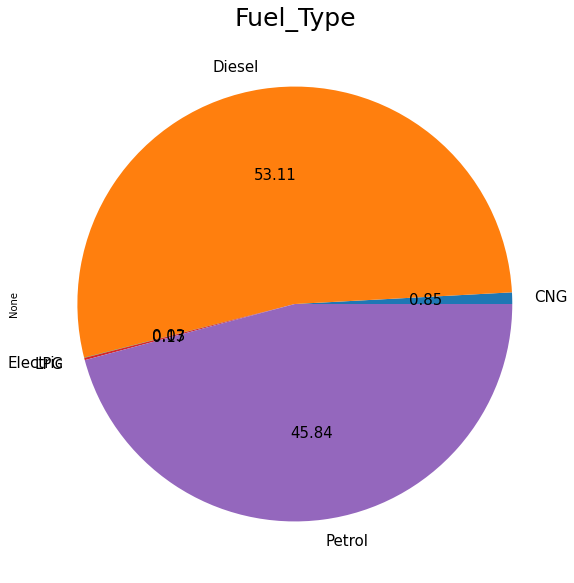

In [35]:
plt.figure(figsize=(15,10))
car.groupby('Fuel_Type').size().plot(kind='pie', autopct='%.2f',fontsize=15)
plt.title('Fuel_Type',fontsize=25)
plt.show()

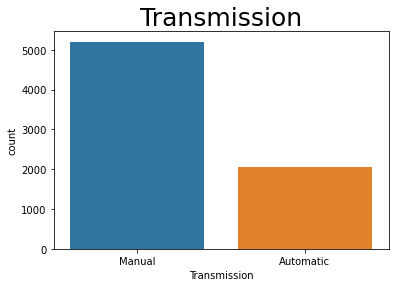

In [36]:
sns.countplot(car['Transmission'])
plt.title('Transmission',fontsize=25)
plt.show()

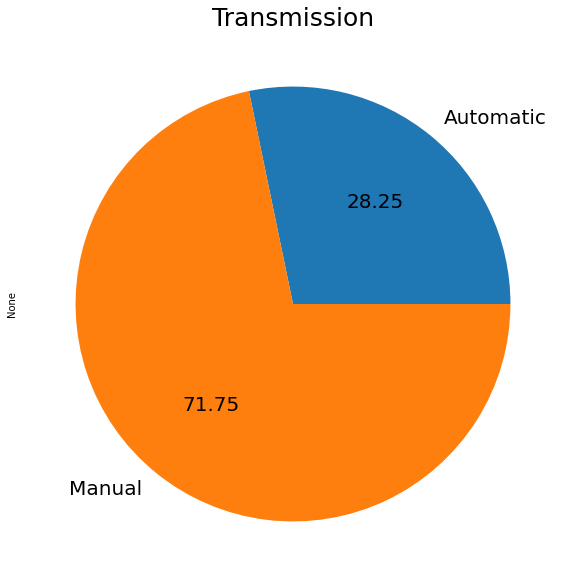

In [37]:
plt.figure(figsize=(15,10))
car.groupby('Transmission').size().plot(kind='pie', autopct='%.2f',fontsize=20)
plt.title('Transmission',fontsize=25)
plt.show()

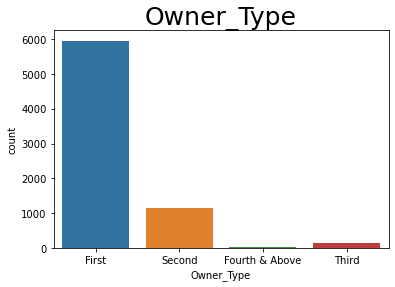

In [38]:
sns.countplot(car['Owner_Type'])
plt.title('Owner_Type',fontsize=25)
plt.show()

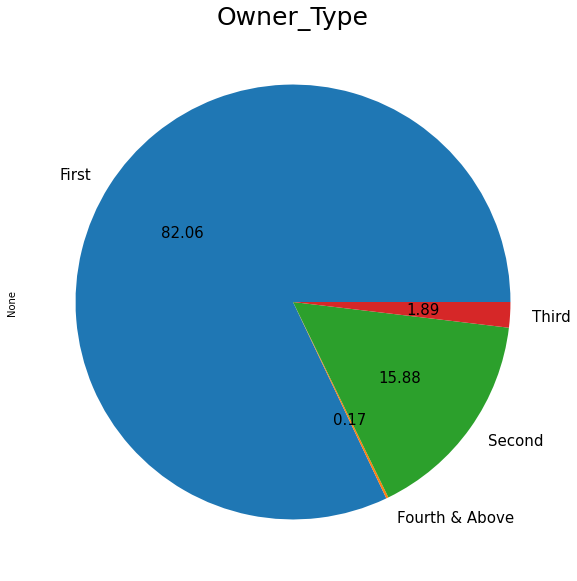

In [39]:
plt.figure(figsize=(15,10))
car.groupby('Owner_Type').size().plot(kind='pie', autopct='%.2f',fontsize=15)
plt.title('Owner_Type',fontsize=25)
plt.show()

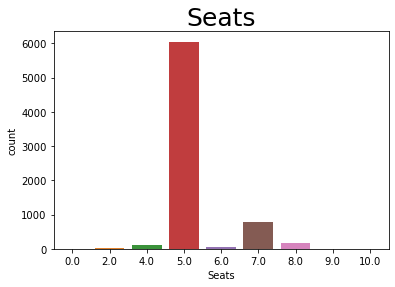

In [40]:
sns.countplot(car['Seats'])
plt.title('Seats',fontsize=25)
plt.show()

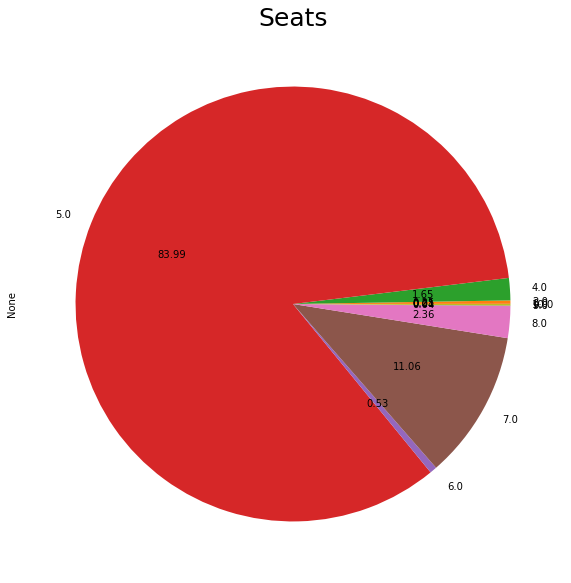

In [41]:
plt.figure(figsize=(15,10))
car.groupby('Seats').size().plot(kind='pie', autopct='%.2f',fontsize=10)
plt.title('Seats',fontsize=25)
plt.show()

# Handling Missing Values

In [42]:
car['Mileage']=car['Mileage'].replace(np.nan,car['Mileage'].median())
car['Engine']=car['Engine'].replace(np.nan,car['Engine'].median())
car['Power']=car['Power'].replace(np.nan,car['Power'].median())
car['Seats']=car['Seats'].replace(np.nan,car['Seats'].mode()[0])

In [43]:
car.isna().sum()

Brand                   0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
Price                1234
dtype: int64

# Univariate Analysis

In [44]:
car['Brand'].value_counts()

Mahindra XUV500 W8 2WD    55
Maruti Swift VDI          49
Maruti Swift Dzire VDI    42
Honda City 1.5 S MT       39
Maruti Swift VDI BSIV     37
                          ..
Maruti Swift 1.3 ZXI       1
BMW 3 Series 330i          1
Tata Indica LEI            1
Volkswagen Vento TSI       1
Tata Indica V2 DLS TC      1
Name: Brand, Length: 2041, dtype: int64

In [45]:
car['Brand'].nunique()

2041

<AxesSubplot:xlabel='Engine', ylabel='Density'>

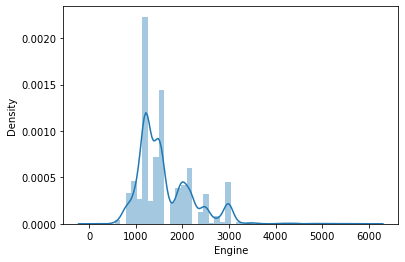

In [46]:
sns.distplot(car['Engine'])

In [47]:
car['Location'].value_counts()

Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64

In [48]:
car['Year'].value_counts()

2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64

In [49]:
car['Kilometers_Driven'].value_counts()

60000    96
45000    86
65000    86
70000    77
50000    72
         ..
24350     1
58217     1
60268     1
21363     1
64917     1
Name: Kilometers_Driven, Length: 3660, dtype: int64

In [50]:
car['Fuel_Type'].value_counts()

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64

In [51]:
car['Transmission'].value_counts()

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64

In [52]:
car['Owner_Type'].value_counts()

First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64

In [53]:
car['Mileage'].value_counts()

17.0     208
18.9     201
18.6     144
21.1     107
20.36    105
        ... 
13.07      1
14.83      1
23.57      1
17.06      1
14.57      1
Name: Mileage, Length: 439, dtype: int64

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

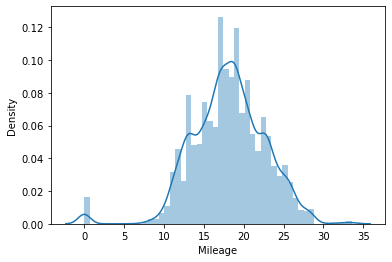

In [54]:
sns.distplot(car['Mileage'])

In [55]:
car['Engine'].value_counts()

1197    732
1248    610
1498    370
998     309
1198    281
       ... 
3197      1
3200      1
1978      1
2112      1
2773      1
Name: Engine, Length: 151, dtype: int64

In [56]:
car['Power'].value_counts()

74.00     280
94.00     197
98.60     166
73.90     152
140.00    142
         ... 
199.30      1
161.00      1
35.50       1
68.10       1
152.88      1
Name: Power, Length: 383, dtype: int64

In [57]:
car['Power'].nunique()

383

<AxesSubplot:xlabel='Power', ylabel='Density'>

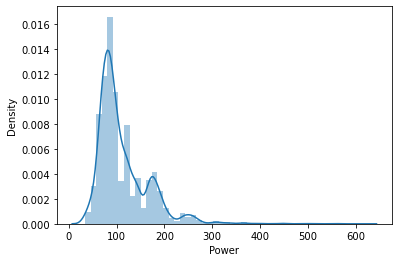

In [58]:
sns.distplot(car['Power'])

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

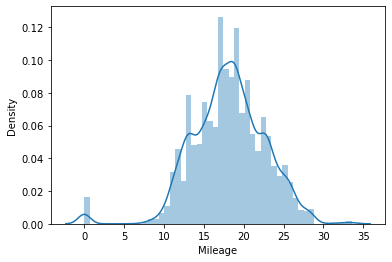

In [59]:
sns.distplot(car['Mileage'])

In [60]:
car['Mileage']=car['Mileage'].astype(float)
car['Engine']=car['Engine'].astype(float)
car['Power']=car['Power'].astype(float)

In [61]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [62]:
car['Seats'].value_counts()

5.0     6100
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

# Bivariate Analysis for Categorical Data

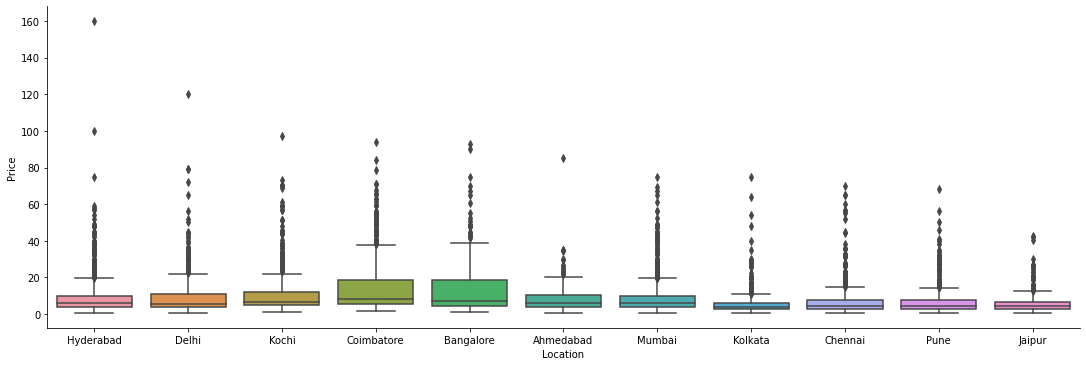

In [63]:
sns.catplot(x='Location',y="Price",data=car.sort_values("Price",ascending=False),kind="box",height=5,aspect=3)

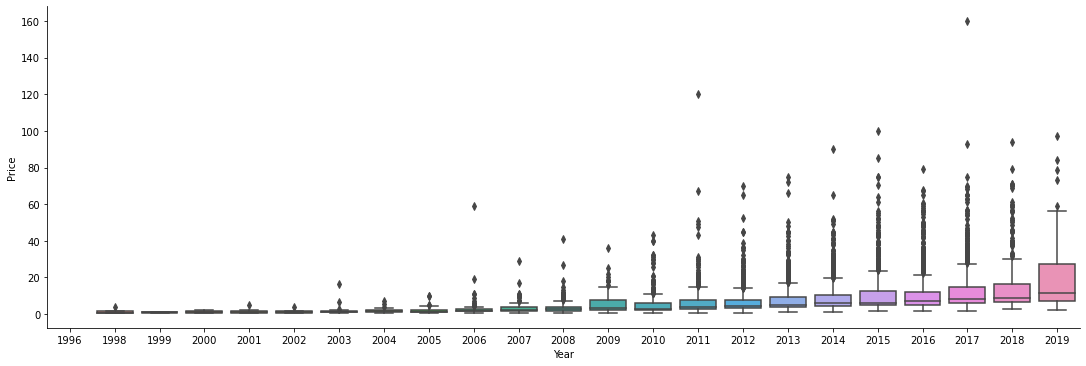

In [64]:
sns.catplot(x='Year',y="Price",data=car.sort_values("Price",ascending=False),kind="box",height=5,aspect=3)

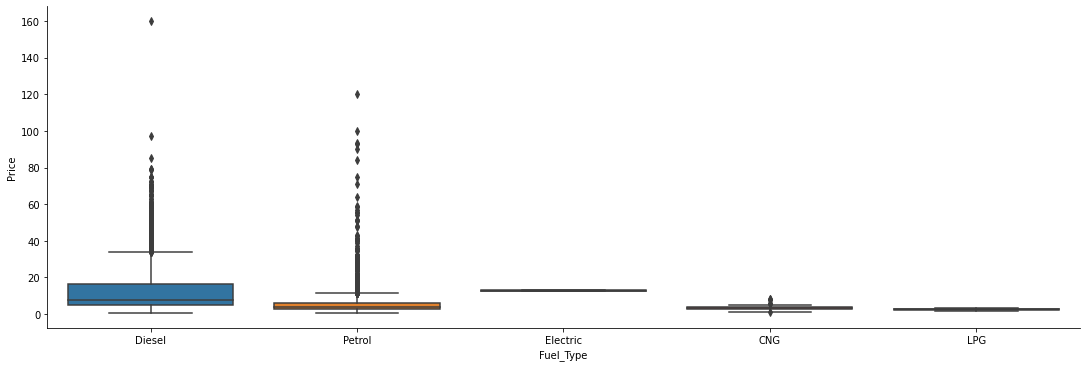

In [65]:
sns.catplot(x='Fuel_Type',y="Price",data=car.sort_values("Price",ascending=False),kind="box",height=5,aspect=3)

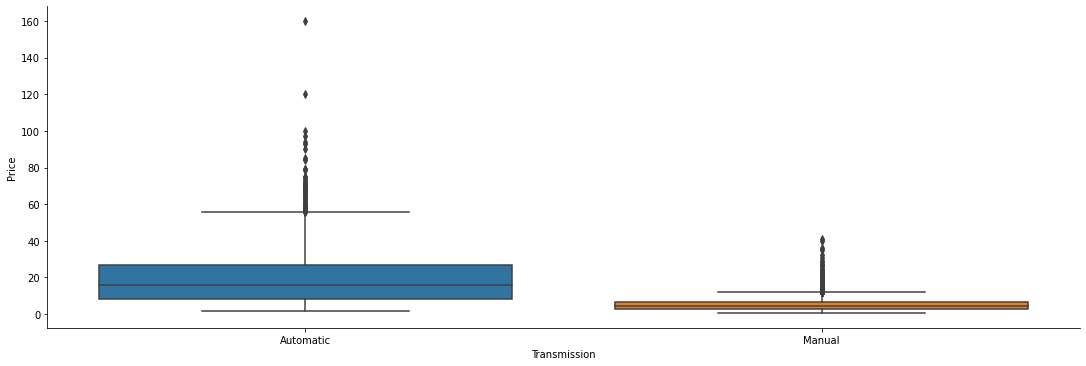

In [66]:
sns.catplot(x='Transmission',y="Price",data=car.sort_values("Price",ascending=False),kind="box",height=5,aspect=3)

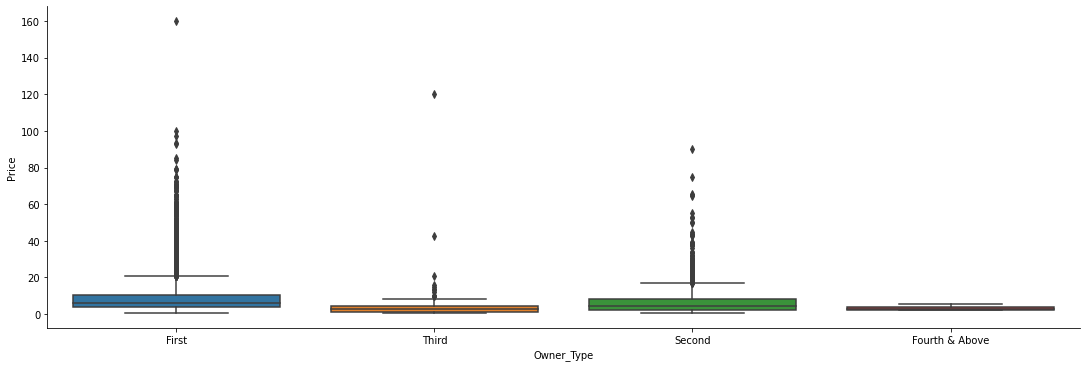

In [67]:
sns.catplot(x='Owner_Type',y="Price",data=car.sort_values("Price",ascending=False),kind="box",height=5,aspect=3)

# Encoding

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
le_enc=LabelEncoder()

In [70]:
car['Brand']=le_enc.fit_transform(car['Brand'])
car['Location']=le_enc.fit_transform(car['Location'])
car['Fuel_Type']=le_enc.fit_transform(car['Fuel_Type'])
car['Transmission']=le_enc.fit_transform(car['Transmission'])
car['Owner_Type']=le_enc.fit_transform(car['Owner_Type'])


In [71]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              7253 non-null   int32  
 1   Location           7253 non-null   int32  
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   int32  
 5   Transmission       7253 non-null   int32  
 6   Owner_Type         7253 non-null   int32  
 7   Mileage            7253 non-null   float64
 8   Engine             7253 non-null   float64
 9   Power              7253 non-null   float64
 10  Seats              7253 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int32(5), int64(2)
memory usage: 538.4 KB


In [72]:
car=car.dropna(axis=0)

In [73]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              6019 non-null   int32  
 1   Location           6019 non-null   int32  
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int32  
 5   Transmission       6019 non-null   int32  
 6   Owner_Type         6019 non-null   int32  
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int32(5), int64(2)
memory usage: 493.7 KB


In [74]:
# separate Categorical feature and Numerical features
car_cat=car.drop(columns=['Mileage','Engine','Power','Kilometers_Driven'],axis=1)
car_num=car.drop(columns=['Brand','Location','Year','Fuel_Type','Transmission','Owner_Type','Seats'])

In [75]:
car_cat.head()

Brand  Location  Year  Fuel_Type  Transmission  Owner_Type  Seats  Price
0   1310         9  2010          0             1           0    5.0   1.75
1    560        10  2015          1             1           0    5.0  12.50
2    529         2  2011          4             1           0    5.0   4.50
3   1160         2  2012          1             1           0    7.0   6.00
4     23         3  2013          1             0           2    5.0  17.74

In [76]:
car_num.head()

Kilometers_Driven  Mileage  Engine   Power  Price
0              72000    26.60   998.0   58.16   1.75
1              41000    19.67  1582.0  126.20  12.50
2              46000    18.20  1199.0   88.70   4.50
3              87000    20.77  1248.0   88.76   6.00
4              40670    15.20  1968.0  140.80  17.74

# Bivariate Analysis

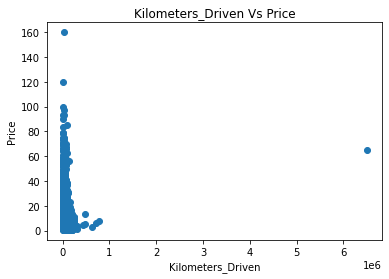

In [77]:
plt.scatter(car_num['Kilometers_Driven'],car_num['Price'])
plt.xlabel('Kilometers_Driven')
plt.ylabel('Price')
plt.title('Kilometers_Driven Vs Price')
plt.show()

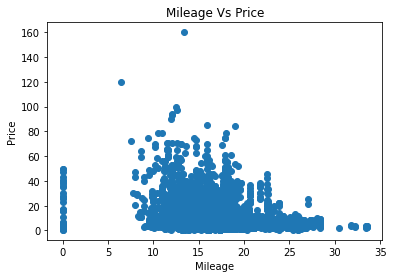

In [78]:
plt.scatter(car_num['Mileage'],car_num['Price'])
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage Vs Price')
plt.show()

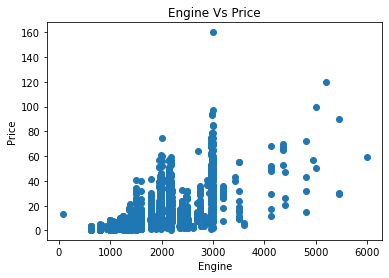

In [79]:
plt.scatter(car_num['Engine'],car_num['Price'])
plt.xlabel('Engine')
plt.ylabel('Price')
plt.title('Engine Vs Price')
plt.show()

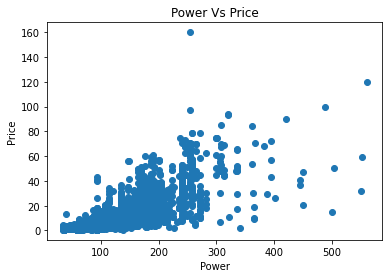

In [80]:
plt.scatter(car_num['Power'],car_num['Price'])
plt.xlabel('Power')
plt.ylabel('Price')
plt.title('Power Vs Price')
plt.show()

# Detection of Outliers

<function matplotlib.pyplot.show(close=None, block=None)>

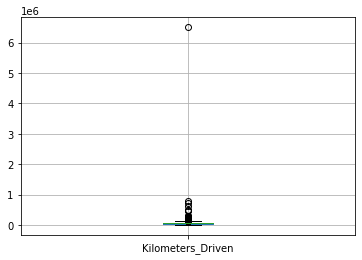

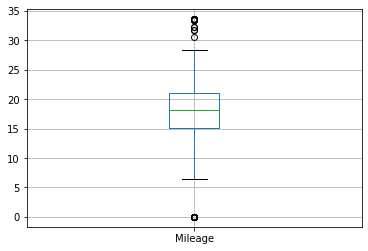

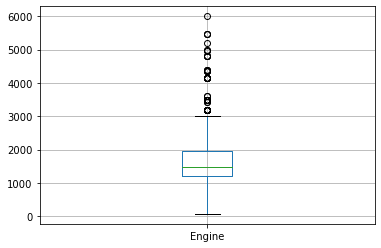

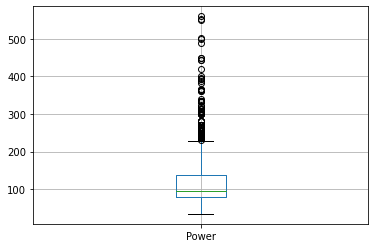

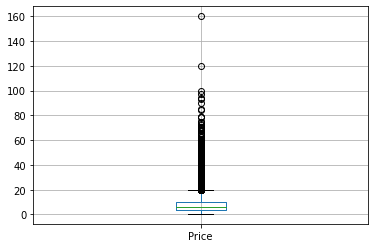

In [81]:
# lets draw the Box plot to indentify the outlier in the the dataframe
# now we will see any outlier present in our dataset using box plot
for column in car_num:  # we pass every column to for loop
    plt.figure()   
    car_num.boxplot([column]) # box plot of every column is plotted
plt.show

# Handling Outliers in the data

In [82]:
q=car_num['Power'].quantile(0.97)# we are removing the bottom 1% data from column "Power"
car_num_1=car_num[car_num['Power']>q]
q=car_num['Engine'].quantile(0.97) # we are removing the bottom 1% data from column "Engine"
car_num_1=car_num[car_num['Engine']<q]
q=car_num['Mileage'].quantile(0.97)# we are removing the bottom 2% data from column "Mileage"
car_num_1=car_num[car_num['Mileage']>q]
q=car_num['Kilometers_Driven'].quantile(0.97)# we are removing the top 2% data from column "Kilometers_Driven"
car_num_1=car_num[car_num['Kilometers_Driven']<q]


In [83]:
car_num.shape

(6019, 5)

In [84]:
car_num_1.shape

(5838, 5)

In [85]:
5838/6019

0.9699285595613889

In [86]:
car_num_1.isna().sum()

Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Price                0
dtype: int64

# Multivaraite Analysis

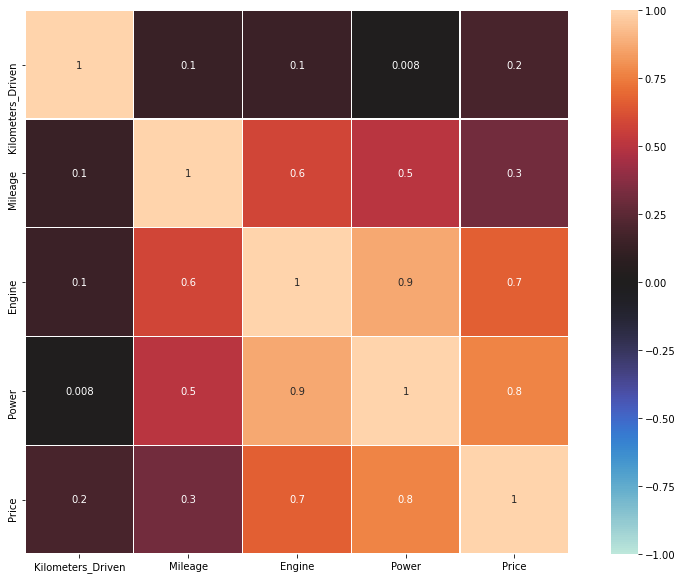

In [87]:
# lets plot heatmap which is multivaraiate analysis,find the coeffient of multicollinearity
df_corr=car_num_1.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=.1)
plt.show()

In [88]:
corr_matrix=car_num_1.corr()   # here we get values of correlation in descending order
corr_matrix['Price'].sort_values(ascending=False)

Price                1.000000
Power                0.772345
Engine               0.670490
Kilometers_Driven   -0.188073
Mileage             -0.316362
Name: Price, dtype: float64

# Skewness Removal

In [89]:
car_num_1.skew()

Kilometers_Driven    0.470979
Mileage             -0.430145
Engine               1.479886
Power                1.956191
Price                3.298604
dtype: float64

In [90]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
car_num_1['Kilometers_Driven']=scaler.fit_transform(car_num_1[['Kilometers_Driven']].values)
car_num_1['Mileage']=scaler.fit_transform(car_num_1[['Mileage']].values)
car_num_1['Engine']=scaler.fit_transform(car_num_1[['Engine']].values)
car_num_1['Power']=scaler.fit_transform(car_num_1[['Power']].values)


In [91]:
#car_num_1['Kilometers_Driven']=np.cbrt(car_num_1[['Kilometers_Driven']])
#car_num_1['Mileage']=np.cbrt(car_num_1[['Mileage']])
#car_num_1['Engine']=np.cbrt(car_num_1[['Engine']])
#car_num_1['Power']=np.cbrt(car_num_1[['Power']])

In [92]:
car_num_1.skew()

Kilometers_Driven   -0.055978
Mileage              0.052864
Engine              -0.056293
Power               -0.000172
Price                3.298604
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

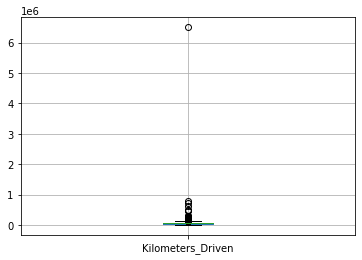

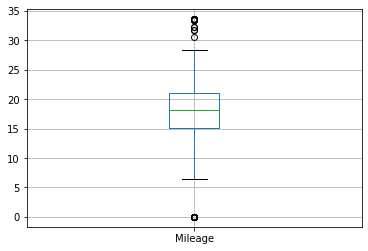

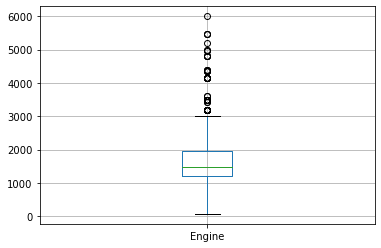

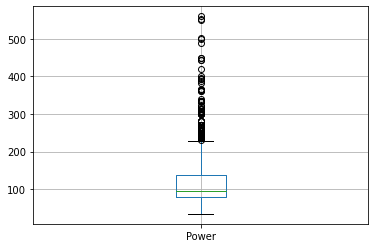

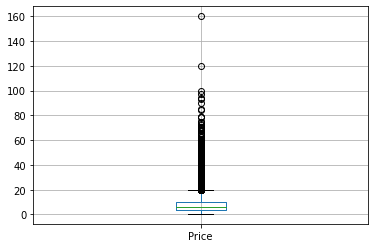

In [93]:
# lets draw the Box plot to indentify the outlier in the the dataframe
# now we will see any outlier present in our dataset using box plot
for column in car_num_1:  # we pass every column to for loop
    plt.figure()   
    car_num.boxplot([column]) # box plot of every column is plotted
plt.show

In [94]:
car_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         6019 non-null   int32  
 1   Location      6019 non-null   int32  
 2   Year          6019 non-null   int64  
 3   Fuel_Type     6019 non-null   int32  
 4   Transmission  6019 non-null   int32  
 5   Owner_Type    6019 non-null   int32  
 6   Seats         6019 non-null   float64
 7   Price         6019 non-null   float64
dtypes: float64(2), int32(5), int64(1)
memory usage: 305.7 KB


In [95]:
car_cat=car_cat.drop(columns=['Price'],axis=1)

In [96]:
car_num_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 0 to 6018
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Kilometers_Driven  5838 non-null   float64
 1   Mileage            5838 non-null   float64
 2   Engine             5838 non-null   float64
 3   Power              5838 non-null   float64
 4   Price              5838 non-null   float64
dtypes: float64(5)
memory usage: 273.7 KB


#Separate Target and Labels

In [97]:
x=car_num_1.drop(columns=['Price'],axis=1)
y=car_num_1['Price']

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

Standard scaler removes the mean and scales each features to unit variance ,we got all transformed values,generally it is useful for those feature which has normal distribution

In [99]:
car_num1=pd.DataFrame(x_scaled,columns = x.columns)# here converted array into dataframe
car_num1.head()

Kilometers_Driven   Mileage    Engine     Power
0           0.661462  0.738787  0.691327  0.279223
1           0.458291  0.499238  0.780978  0.598988
2           0.494123  0.451550  0.727981  0.465052
3           0.747749  0.535680  0.735813  0.465326
4           0.455871  0.358059  0.820788  0.637008

In [100]:
# here we will use concate method to combine both dataframe

In [101]:
car_new=pd.concat([car_num_1,car_cat],axis=1)

In [102]:
car_new.isna().sum()

Kilometers_Driven    181
Mileage              181
Engine               181
Power                181
Price                181
Brand                  0
Location               0
Year                   0
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                  0
dtype: int64

In [103]:
car_new=car_new.dropna(axis=0)

In [104]:
car_new.reset_index(drop=True)

Kilometers_Driven   Mileage    Engine     Power  Price  Brand  Location  \
0              0.710870  1.981034 -1.266488 -1.494323   1.75   1310         9   
1             -0.374101  0.291133  0.154919  0.560150  12.50    560        10   
2             -0.182748 -0.045279 -0.685341 -0.300384   4.50    529         2   
3              1.171653  0.548214 -0.561163 -0.298620   6.00   1160         2   
4             -0.387022 -0.704812  0.786107  0.804429  17.74     23         3   
...                 ...       ...       ...       ...    ...    ...       ...   
5833          -0.945711  2.445513 -0.561163 -0.789747   4.75   1265         4   
5834           1.547896  1.427056 -0.898845 -0.906310   4.00    732         6   
5835           0.143543 -0.957723  1.446093  0.281769   2.90   1025         6   
5836          -0.182748  0.113878 -1.266488 -1.068396   2.65   1317         8   
5837          -0.145408  1.687010 -1.474466 -1.523974   2.50    173         5   

      Year  Fuel_Type  Transmission  Owner_Type  Seats  
0     2010          0             1           0    5.0  
1     2015          1             1           0    5.0  
2     2011          4             1           0    5.0  
3     2012          1             1           0    7.0  
4     2013          1             0           2    5.0  
...    ...        ...           ...         ...    ...  
5833  2014          1             1           0    5.0  
5834  2015          1             1           0    5.0  
5835  2012          1             1           2    8.0  
5836  2013          4             1           0    5.0  
5837  2011          1             1           0    5.0  

[5838 rows x 12 columns]

In [105]:
car_new.isna().sum()

Kilometers_Driven    0
Mileage              0
Engine               0
Power                0
Price                0
Brand                0
Location             0
Year                 0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
dtype: int64

In [106]:
car_new.head()

Kilometers_Driven   Mileage    Engine     Power  Price  Brand  Location  \
0           0.710870  1.981034 -1.266488 -1.494323   1.75   1310         9   
1          -0.374101  0.291133  0.154919  0.560150  12.50    560        10   
2          -0.182748 -0.045279 -0.685341 -0.300384   4.50    529         2   
3           1.171653  0.548214 -0.561163 -0.298620   6.00   1160         2   
4          -0.387022 -0.704812  0.786107  0.804429  17.74     23         3   

   Year  Fuel_Type  Transmission  Owner_Type  Seats  
0  2010          0             1           0    5.0  
1  2015          1             1           0    5.0  
2  2011          4             1           0    5.0  
3  2012          1             1           0    7.0  
4  2013          1             0           2    5.0

In [107]:
x=car_new.drop(columns=['Price'],axis=1)
y=car_new['Price']

In [108]:
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5838, dtype: float64

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

Train test split is used to evaluate the performance of algorithm when we have large data,It divide the data into two set,training and testing phase, training data is used for fitting machine learning model and testing data is used for evaluating model performance

In [110]:
# finding best random state
from sklearn.tree import DecisionTreeRegressor
maxr2=0  # initially max r2 is set to 0
MaxRs=0  # initially Random state is set to 0
for i in range(1,200): # in for loop we pass 1 to 200 number out of which random state is selected
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i) # used train_test_split in for loop
    mod=DecisionTreeRegressor()
    mod.fit(x_train,y_train)  # fit training data of feature and label to model decision tree
    pred=mod.predict(x_test) # predict label by using test features
    r2=r2_score(y_test,pred) # genrate r2 score by comparing test label and predicted label
    if r2> maxr2:
        maxr2=r2 # assign r2 score to max r2
        MaxRs=i  # the number at which we get max r2 is treated as random state
print('Best r2 is',maxr2,"on Random state",MaxRs)

Best r2 is 0.8543732736247471 on Random state 149


By using this code , we get best Random state when r2 score for each random state is checked, and the state at which we get highest r2 score, is considered as best random state

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=MaxRs)

# Feature Selection

In [112]:
from sklearn.feature_selection import mutual_info_regression

In [113]:
mutual_info=mutual_info_regression(x_train,y_train)
mutual_info

array([0.05806984, 0.4404501 , 0.62544091, 0.79186884, 0.81579275,
       0.16185028, 0.28160419, 0.12904329, 0.23285862, 0.03926334,
       0.06257841])

In [114]:
# convert entire information into series
mutual_info=pd.Series(mutual_info)

In [115]:
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

Brand                0.815793
Power                0.791869
Engine               0.625441
Mileage              0.440450
Year                 0.281604
Transmission         0.232859
Location             0.161850
Fuel_Type            0.129043
Seats                0.062578
Kilometers_Driven    0.058070
Owner_Type           0.039263
dtype: float64

<AxesSubplot:>

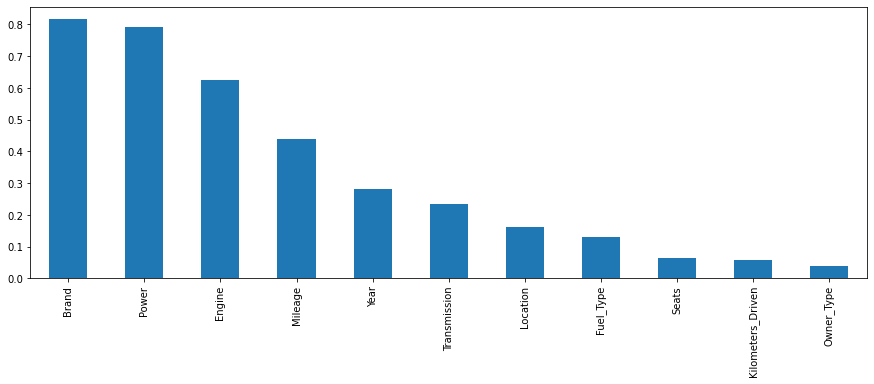

In [116]:
# now draw bar graph
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [117]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns=SelectPercentile(mutual_info_regression,percentile=85)
selected_top_columns.fit(x_train,y_train)
x_train.columns[selected_top_columns.get_support()]

Index(['Mileage', 'Engine', 'Power', 'Brand', 'Location', 'Year', 'Fuel_Type',
       'Transmission', 'Seats'],
      dtype='object')

# Model Bulding

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from  sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


In [119]:
# model instantiating and training
Li_reg=LinearRegression()  # assign linear regression as Li_reg
Li_reg.fit(x_train,y_train) # fit train feature and label to linear regression
# find r2 score for trained model
Li_reg.score(x_train,y_train)  # find r2 score for train data

0.618348293682081

In [120]:
# lets check,how model fits to test data
Li_reg.score(x_test,y_test)

0.5980061938344554

In [121]:
pred1=Li_reg.predict(x_test)  # now we predict label by passing test feature
Linear_regression_score=r2_score(y_test,pred1) # we get r2 score by passing predicted label and actual label
Linear_regression_score

0.5980061938344554

In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [123]:
mean_absolute_error(y_test,pred1)

4.410635425137194

In [124]:
mean_squared_error(y_test,pred1)

42.57985194296934

In [125]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred2=KNR.predict(x_test)
KNR__score=r2_score(y_test,pred2)
KNR__score

0.8845382186354649

KNN store all cases and classify new model based on distance(Euclidean method),classification done by majority of votes neighbors

In [126]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred3=DTR.predict(x_test)
DTR__score=r2_score(y_test,pred3)
DTR__score

0.8663468665538032

Decision Tree builds model in the form of tree structure,it divide the dataset into smaller and smaller subset, we determine the root node,then split the subsets,repeat the process till all instance have same class

In [127]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred4=RFR.predict(x_test)
RFR__score=r2_score(y_test,pred4)
RFR__score

0.9167250431618892

it is ensemble algorithm which combines more than one algorithm of same or different kind.Random Forest gives outcome based on predictions of number of models by taking mean of output from various trees

In [128]:
ABR=AdaBoostRegressor()
ABR.fit(x_train,y_train)
pred5=ABR.predict(x_test)
ABR__score=r2_score(y_test,pred5)
ABR__score

0.36885679083282363

Adaboost regressor is meta estimator that begin by fitting a regressor on original dataset, and then fits additional copies of regressor on same dataset but where the weights of instance are adjusted

# Cross Validation Techniques

In [129]:
from sklearn.model_selection import cross_val_score

CV is a technique used to check whether model is overfitted or not, if model accuracy is high, then there is chances of model is overfitted.We use CV score for every model,for this we require model,features and labels, cv is cross validation spliting strategy.finally it take mean of all iteration and return cv score

In [130]:
Linear_regression_cv_score=cross_val_score(Li_reg,x,y,cv=5).mean() # we pass Linear regression model,feature,target and cv=5 means 4 set for training and 1 for testing
Linear_regression_cv_score

0.6104792970889148

In [131]:
KNR_CV_score=cross_val_score(KNR,x,y,cv=5).mean() # we pass KNR model,feature,target and cv=5 means 4 set for training and 1 for testing
KNR_CV_score

0.8287846595573324

In [132]:
DTR_CV_score=cross_val_score(DTR,x,y,cv=5).mean() # we pass model Decision Tree Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
DTR_CV_score

0.7601116222834797

In [133]:
RFR_CV_score=cross_val_score(RFR,x,y,cv=5).mean() # we pass model Random Forest Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
RFR_CV_score

0.8725790786260555

In [134]:
ABR_CV_score=cross_val_score(ABR,x,y,cv=5).mean() # we pass model Ada boost Regressor,feature,target and cv=5 means 4 set for training and 1 for testing
ABR_CV_score

0.5459232872310877

In [135]:
Linear_regression_diff=Linear_regression_score*100-Linear_regression_cv_score*100
print('Linear_regression_diff',Linear_regression_diff)
KNR_diff=KNR__score*100-KNR_CV_score*100
print('KNR_diff',KNR_diff)
DTR_diff=DTR__score*100-DTR_CV_score*100
print("DTR_diff",DTR_diff)
RFR_diff=RFR__score*100-RFR_CV_score*100
print("RFR_diff",RFR_diff)
ABR_diff=ABR__score*100-ABR_CV_score*100
print("ABR_diff",ABR_diff)


Linear_regression_diff -1.2473103254459375
KNR_diff 5.575355907813261
DTR_diff 10.62352442703235
RFR_diff 4.414596453583371
ABR_diff -17.70664963982641


In [136]:
print("Linear_regression_score",Linear_regression_score*100)
print("Linear_regression_cv_score", Linear_regression_cv_score*100)
print("Linear_regression_diff", Linear_regression_diff)
print("-------------------------------------------------------------------------------------------")
print("KNR__score",KNR__score*100)
print("KNR_CV_score",KNR_CV_score*100)
print("KNR_diff",KNR_diff)
print("-------------------------------------------------------------------------------------------")
print("DTR__score",DTR__score*100)
print("DTR_CV_score", DTR_CV_score*100)
print("DTR_diff",DTR_diff)

print("-------------------------------------------------------------------------------------------")
print("RFR__score",RFR__score*100)
print("RFR_CV_score",RFR_CV_score*100)
print("RFR_diff", RFR_diff)
print("-------------------------------------------------------------------------------------------")

print("ABR__score",ABR__score*100)
print("ABR_CV_score",ABR_CV_score*100)
print("ABR_diff",ABR_diff)
print("-------------------------------------------------------------------------------------------")


Linear_regression_score 59.80061938344554
Linear_regression_cv_score 61.04792970889148
Linear_regression_diff -1.2473103254459375
-------------------------------------------------------------------------------------------
KNR__score 88.4538218635465
KNR_CV_score 82.87846595573323
KNR_diff 5.575355907813261
-------------------------------------------------------------------------------------------
DTR__score 86.63468665538032
DTR_CV_score 76.01116222834797
DTR_diff 10.62352442703235
-------------------------------------------------------------------------------------------
RFR__score 91.67250431618892
RFR_CV_score 87.25790786260555
RFR_diff 4.414596453583371
-------------------------------------------------------------------------------------------
ABR__score 36.88567908328236
ABR_CV_score 54.59232872310877
ABR_diff -17.70664963982641
-------------------------------------------------------------------------------------------


here we get r2 score, cv score and difference between them for each model, for Random forest regressor, we get highest r2 score and highest cvscore , also difference between them is also very less. So we will conclude that RFR is best model for flight price prediction, lets do hyperparameter tuning for Random forest regressor

# Hyperparameter Tuning

In [137]:
from sklearn.model_selection import GridSearchCV

GridsearchCV is parameter tuning approach which build and evaluate the model performance based on best parameters, we pass parameters of only those model which has less difference between accuracy and cv score. after passing the best parameter we can get best and authenticated accuracy which is not overfitted also

In [138]:
params={'n_estimators':[10,12,13],
       'criterion':['mse'],
       'max_depth':[10,15],
       'min_samples_leaf':[5,6],
       'min_samples_split':[10,11]}

Here we created list of parameter for Random Forest Regressor

In [139]:
Grid_RFR=GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)
Grid_RFR.fit(x_train,y_train)
Grid_RFR.best_params_

{'criterion': 'mse',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 13}

now we will pass this parameter to Random forest classifier to get best r2 score

In [143]:
Final_RFR=RandomForestRegressor(criterion='mse',max_depth=15,min_samples_leaf= 5,min_samples_split=11,n_estimators=13)
Final_RFR.fit(x_train,y_train)
final_pred=Final_RFR.predict(x_test)
final_score=r2_score(y_test,final_pred)
print(final_score*100)

91.17911260069583


here we get r2 score in between 87 to 89 for Random forest regressor

# Line plot for predicted values and Actual values

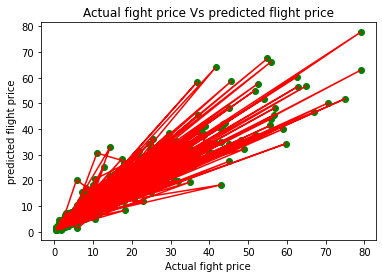

In [141]:
plt.scatter(y_test,final_pred,color='g')  # plot scatter of actual sales Vs predicted sales
plt.plot(y_test,final_pred,color='r') # here we plot line plot for actual sales vs predicted sales
plt.xlabel("Actual fight price") # x axis label is "Actual Sales"
plt.ylabel("predicted flight price")# y axis label is "predicted sales"
plt.title('Actual fight price Vs predicted flight price') # Titel is given
plt.show()  # display graph

# Model Saving

In [142]:
import joblib
joblib.dump(Final_RFR,"Car Price Prediction.pkl")

['Car Price Prediction.pkl']